Name: Karnavat Kush Kaileshbhai

Reg No.: 21BCE5545

Assignment

1. Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

2. Importing the dataset

In [3]:
dataset=pd.read_csv("Titanic-Dataset.csv")

In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Checking for Null Values

In [6]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Cabin_missing'] = dataset['Cabin'].isnull().astype(int)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin_missing    0
dtype: int64

4. Data Visualization

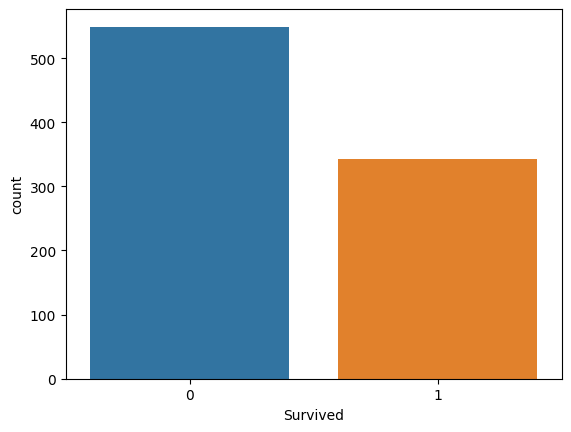

In [12]:
sns.countplot(x='Survived', data=dataset)
plt.show()

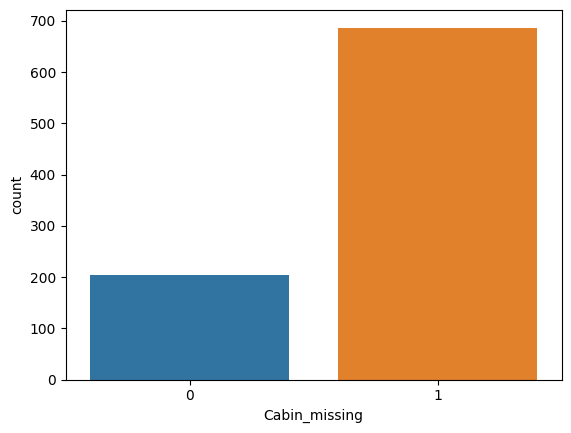

In [13]:
sns.countplot(x='Cabin_missing', data=dataset)
plt.show()

5. Outlier Detection

<Axes: >

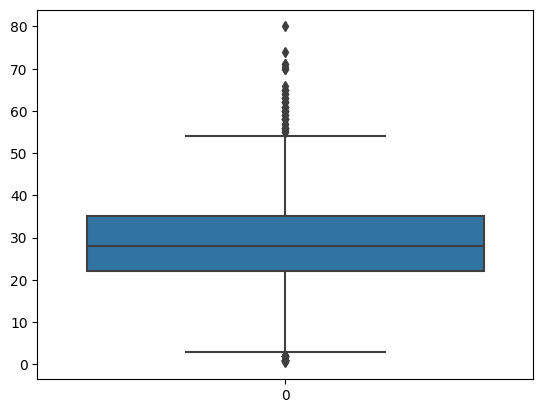

In [14]:
sns.boxplot(dataset.Age)

In [15]:
from scipy import stats

In [16]:
age_zscore = stats.zscore(dataset.Age)
age_zscore

0     -0.565736
1      0.663861
2     -0.258337
3      0.433312
4      0.433312
         ...   
886   -0.181487
887   -0.796286
888   -0.104637
889   -0.258337
890    0.202762
Name: Age, Length: 891, dtype: float64

In [17]:
df_z = dataset[np.abs(age_zscore)<=3]

<Axes: >

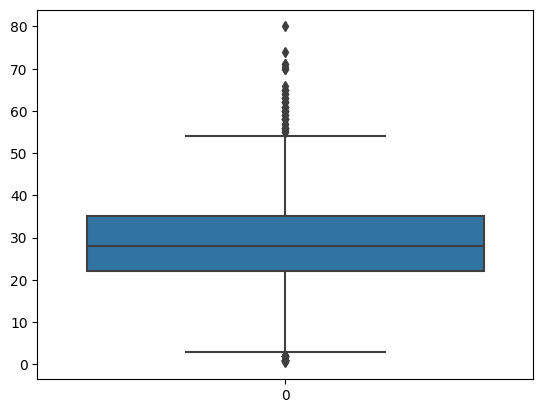

In [18]:
sns.boxplot(dataset.Age)

6. Splitting Dependent and Independent variables

In [19]:
x = df_z.iloc[:,[2,4,5,6,7,10,11]]
y = df_z["Survived"]

In [20]:
print(x.shape,y.shape)

(884, 7) (884,)


7. Perform Encoding

In [21]:
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

<ipython-input-21-8d8648880710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = le.fit_transform(x['Sex'])


In [25]:
x['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 884, dtype: int64

In [22]:
x.Embarked.value_counts()

S    642
C    166
Q     76
Name: Embarked, dtype: int64

In [23]:
x = pd.get_dummies(x, columns=['Embarked'], drop_first=True)

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_missing,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0,1


8. Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_missing,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,-0.562466,1,0,A/5 21171,-0.501188,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.719303,1,0,PC 17599,0.784046,0,0,0
2,3,3,"Heikkinen, Miss. Laina",0,-0.242024,0,0,STON/O2. 3101282,-0.487640,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.478972,1,0,113803,0.419083,0,0,1
4,5,3,"Allen, Mr. William Henry",1,0.478972,0,0,373450,-0.485131,1,0,1


9.  Splitting Data into Train and Test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((618, 12), (266, 12), (618,), (266,))